<a href="https://colab.research.google.com/github/MIRELA-CR/k-meansClustering/blob/main/k_meansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random
from sklearn.cluster import KMeans
from collections import Counter

In [ ]:
xls = pd.ExcelFile('/content/drive/MyDrive/Colab Notebooks/UDJG_CHILD_CONS.xls')
df = pd.read_excel(xls, 'Data')

In [ ]:
meals = df.values[:,1:14]

In [ ]:
scaler = StandardScaler()
meals_z = scaler.fit_transform(meals)

In [ ]:
# apply k-means

random.seed(2345)

#kmeans = KMeans(init="random", n_clusters=5, n_init=10, max_iter=300,random_state=42)

kmeans = KMeans(n_clusters=5, init = 'random', max_iter = 300, n_init = 10, random_state = 7)

kmeans.fit(meals_z)
X = np.array(df.loc[:,['101 lactate', '102 grasimi', '108 carne','109 peste', '110 oua', '202 ulei', '204 fructe', '206 cereale', '207 panificatie', '305 ciocolata', '311 zaharuri', '414 bauturi', '612 dressing', '815 snacksuri']]).reshape(-1,14)


In [ ]:
df.head()

,STUDENT,101 lactate,102 grasimi,108 carne,109 peste,110 oua,202 ulei,204 fructe,206 cereale,207 panificatie,305 ciocolata,311 zaharuri,414 bauturi,612 dressing,815 snacksuri,SEASON,EATSEQ,Unnamed: 17
0,CC021,5,2,1,0,1,0,13,2,5,1,3,2,4,0,5,1.755439,NaN
1,CC022,4,3,3,0,1,3,40,2,5,1,3,2,4,0,5,1.327588,NaN
2,CC023,2,0,1,0,1,1,15,1,2,0,0,1,1,0,5,1.000000,NaN
3,CC024,3,0,3,0,1,1,15,1,2,0,0,1,2,0,5,1.111750,NaN
4,CC025,1,1,0,1,1,1,4,0,3,0,0,3,1,0,5,1.614598,NaN


<Axes: >

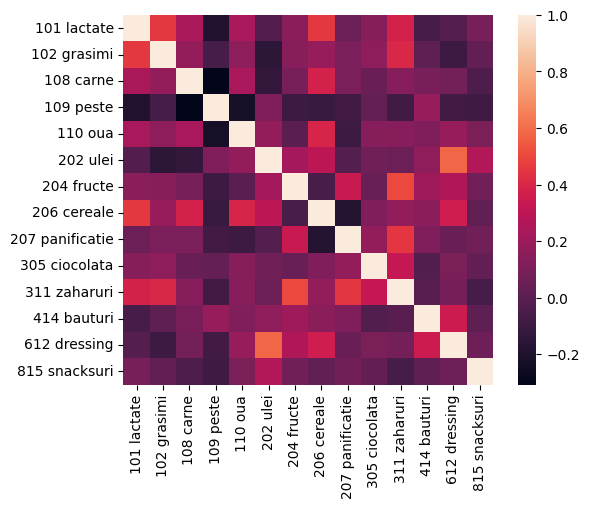

In [ ]:
import seaborn as sns
df1 = df[['101 lactate', '102 grasimi', '108 carne','109 peste', '110 oua',
          '202 ulei', '204 fructe', '206 cereale', '207 panificatie', '305 ciocolata', '311 zaharuri', '414 bauturi', '612 dressing', '815 snacksuri']] #Subsetting the data
cor = df1.corr() #Calculate the correlation of the above variables
sns.heatmap(cor, square = True) #Plot the correlation as heat map

In [ ]:
kmeans.n_iter_
kmeans.cluster_centers_

array([[-6.97172900e-01, -6.44187296e-01, -7.01744927e-01,
         4.79923549e-01, -3.43788687e-01,  4.76999046e-01,
         1.92793573e-01, -5.99110617e-01,  1.04980894e-01,
        -2.71108834e-01, -1.57000521e-01, -4.29637191e-02,
         2.15237172e-01],
       [ 3.47736009e-01,  5.93721010e-01,  9.54643855e-01,
        -3.21287732e-01,  1.41881046e+00,  1.89285336e-01,
        -5.38856130e-01,  1.31721612e+00, -7.49863532e-01,
        -5.16397779e-01,  4.35507686e-03,  5.22838910e-01,
         7.56630299e-01],
       [ 2.69392323e-01,  3.58931338e-01,  2.59190369e-01,
        -2.17234318e-01, -3.43788687e-01, -7.58862119e-01,
        -7.12852128e-02, -2.87508306e-01, -3.29325469e-02,
        -1.81912854e-01, -2.43884304e-01, -1.72144194e-01,
        -6.78186616e-01],
       [ 2.01743581e+00,  2.28582589e+00,  5.55514028e-01,
        -3.21287732e-01,  3.81987430e-01, -2.64999470e-02,
         2.43120702e+00,  7.12696645e-01,  2.38055268e+00,
         1.93649167e+00,  4.96914270e

In [ ]:
df['cluster'] = kmeans.labels_
Counter(df['cluster'])

Counter({3: 2, 2: 22, 0: 20, 1: 7, 4: 6})

In [ ]:
df.groupby('cluster')['SEASON'].mean()

cluster
0    1.850000
1    3.285714
2    3.590909
3    5.000000
4    3.666667
Name: SEASON, dtype: float64

In [ ]:
df.groupby('cluster')['EATSEQ'].mean()

cluster
0    1.338351
1    1.298935
2    1.352193
3    1.541514
4    1.303259
Name: EATSEQ, dtype: float64